In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing - dealing with text data

In [2]:
imdb = pd.read_csv('sample_imdb.csv', encoding="latin1")
imdb.head()

,review,sentiment
0,Beware the Scottish Play! In his riveting and ...,positive
1,I think this is a lovely family movie. There a...,positive
2,"As Dr. Alan Feinstone, Corbin Bernsen turns a ...",positive
3,Well the reason for seeing it in the cinema wa...,negative
4,Having seen the full length film Kieslowski ma...,positive


In [4]:
imdb.shape

(5000, 2)

## Documents vs Corpus

- **Documents**: each observation, each row of the dataset above.
    
- **Corpus**: the whole set of observations, the whole dataset. 

## Extracting features from text

- Transforming words in numbers

## One Hot Encoding

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
encoder = OneHotEncoder()

In [3]:
len(set(imdb.review.str.cat().split()))

105781

In [ ]:
"I love to hate this movie"
'I hate to love this movie'

In [ ]:
'I love this movie'
'I love love love love this movie'

- Too many words will lead to too many dimensions!
- Miss information about frequency of words
- Context is not captured nor order of words

## Count Vectorizer

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
train_text = ["Be yourself; everyone else is already taken.",
              "A room without books is like a body without a soul.",
              "Be the change that you wish to see in the world.",
              "If you tell the truth, you don't have to remember anything.",
              "Always forgive your enemies; nothing annoys them so much."
             ]

count_vectorizer = CountVectorizer()

In [9]:
count_vectorizer.fit_transform(train_text)

<5x38 sparse matrix of type '<class 'numpy.int64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [10]:
count_vectorizer.fit(train_text)

CountVectorizer()

In [11]:
count_vectorizer.vocabulary_

{'be': 4,
 'yourself': 37,
 'everyone': 11,
 'else': 9,
 'is': 16,
 'already': 0,
 'taken': 25,
 'room': 21,
 'without': 33,
 'books': 6,
 'like': 17,
 'body': 5,
 'soul': 24,
 'the': 28,
 'change': 7,
 'that': 27,
 'you': 35,
 'wish': 32,
 'to': 30,
 'see': 22,
 'in': 15,
 'world': 34,
 'if': 14,
 'tell': 26,
 'truth': 31,
 'don': 8,
 'have': 13,
 'remember': 20,
 'anything': 3,
 'always': 1,
 'forgive': 12,
 'your': 36,
 'enemies': 10,
 'nothing': 19,
 'annoys': 2,
 'them': 29,
 'so': 23,
 'much': 18}

In [12]:
count_vectorizer.vocabulary_.get('like')

17

In [13]:
count_vectorizer.vocabulary_['like']

17

In [14]:
count_vectorizer.stop_words_

set()

In [15]:
transformed_vector = count_vectorizer.transform(train_text)
transformed_vector

<5x38 sparse matrix of type '<class 'numpy.int64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [16]:
transformed_vector.toarray()

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [17]:
count_vectorizer.get_feature_names()

['already',
 'always',
 'annoys',
 'anything',
 'be',
 'body',
 'books',
 'change',
 'don',
 'else',
 'enemies',
 'everyone',
 'forgive',
 'have',
 'if',
 'in',
 'is',
 'like',
 'much',
 'nothing',
 'remember',
 'room',
 'see',
 'so',
 'soul',
 'taken',
 'tell',
 'that',
 'the',
 'them',
 'to',
 'truth',
 'wish',
 'without',
 'world',
 'you',
 'your',
 'yourself']

In [18]:
pd.DataFrame(transformed_vector.toarray(), columns=count_vectorizer.get_feature_names())

,already,always,annoys,anything,be,body,books,change,don,else,...,the,them,to,truth,wish,without,world,you,your,yourself
0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,2,0,1,0,1,0,1,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,1,0,1,1,0,0,0,2,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


- Deals with the matter of frequency only
- The other drawbacks remain

## N-Grams

In [19]:
train_text

['Be yourself; everyone else is already taken.',
 'A room without books is like a body without a soul.',
 'Be the change that you wish to see in the world.',
 "If you tell the truth, you don't have to remember anything.",
 'Always forgive your enemies; nothing annoys them so much.']

### Bigram

In [20]:
n_gram_vectorizer = CountVectorizer(ngram_range=(2, 2))

In [21]:
transformed_vector = n_gram_vectorizer.fit_transform(train_text)

transformed_vector.shape

(5, 41)

In [22]:
pd.DataFrame(transformed_vector.toarray(), columns=n_gram_vectorizer.get_feature_names())

,already taken,always forgive,annoys them,be the,be yourself,body without,books is,change that,don have,else is,...,to see,truth you,wish to,without books,without soul,you don,you tell,you wish,your enemies,yourself everyone
0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
n_gram_vectorizer.vocabulary_

{'be yourself': 4,
 'yourself everyone': 40,
 'everyone else': 11,
 'else is': 9,
 'is already': 16,
 'already taken': 0,
 'room without': 21,
 'without books': 34,
 'books is': 6,
 'is like': 17,
 'like body': 18,
 'body without': 5,
 'without soul': 35,
 'be the': 3,
 'the change': 26,
 'change that': 7,
 'that you': 25,
 'you wish': 38,
 'wish to': 33,
 'to see': 31,
 'see in': 22,
 'in the': 15,
 'the world': 28,
 'if you': 14,
 'you tell': 37,
 'tell the': 24,
 'the truth': 27,
 'truth you': 32,
 'you don': 36,
 'don have': 8,
 'have to': 13,
 'to remember': 30,
 'remember anything': 20,
 'always forgive': 1,
 'forgive your': 12,
 'your enemies': 39,
 'enemies nothing': 10,
 'nothing annoys': 19,
 'annoys them': 2,
 'them so': 29,
 'so much': 23}

In [24]:
transformed_vector.toarray()

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]],
      dtype=int64)

In [25]:
n_gram_vectorizer.inverse_transform(transformed_vector)

[array(['be yourself', 'yourself everyone', 'everyone else', 'else is',
        'is already', 'already taken'], dtype='<U17'),
 array(['room without', 'without books', 'books is', 'is like',
        'like body', 'body without', 'without soul'], dtype='<U17'),
 array(['be the', 'the change', 'change that', 'that you', 'you wish',
        'wish to', 'to see', 'see in', 'in the', 'the world'], dtype='<U17'),
 array(['if you', 'you tell', 'tell the', 'the truth', 'truth you',
        'you don', 'don have', 'have to', 'to remember',
        'remember anything'], dtype='<U17'),
 array(['always forgive', 'forgive your', 'your enemies',
        'enemies nothing', 'nothing annoys', 'annoys them', 'them so',
        'so much'], dtype='<U17')]

- Usually able to find authorship patterns

In [26]:
n_gram_vectorizer = CountVectorizer(ngram_range=(2, 2))
n_gram_vectorizer.fit(imdb.review)

CountVectorizer(ngram_range=(2, 2))

In [27]:
len(n_gram_vectorizer.vocabulary_)

434117

## Tf-IDf

- Term frequency - if a word occurs often in a document, the algorithm will consider the word important

- Inverse Document Frequency - if a word occurs frequently on the **corpus**, it means it has few information (information theory)

In [4]:
train_text = ['Be yourself; everyone else is already taken change.',
             'A room without books is like a body without a soul .',
             'Be the change that you wish to see in the world and change everything, this would change it all!.',
             "If you tell the truth, you don't have to remember change anything.",
             'Always forgive your enemies; nothing annoys change them so much.']

train_text

['Be yourself; everyone else is already taken change.',
 'A room without books is like a body without a soul .',
 'Be the change that you wish to see in the world and change everything, this would change it all!.',
 "If you tell the truth, you don't have to remember change anything.",
 'Always forgive your enemies; nothing annoys change them so much.']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

tfidf_vectorizer = TfidfVectorizer()

In [6]:
tfidf_vector = tfidf_vectorizer.fit_transform(train_text)

tfidf_vectorizer.vocabulary_

{'be': 6,
 'yourself': 43,
 'everyone': 13,
 'else': 11,
 'is': 19,
 'already': 1,
 'taken': 29,
 'change': 9,
 'room': 25,
 'without': 38,
 'books': 8,
 'like': 21,
 'body': 7,
 'soul': 28,
 'the': 32,
 'that': 31,
 'you': 41,
 'wish': 37,
 'to': 35,
 'see': 26,
 'in': 18,
 'world': 39,
 'and': 3,
 'everything': 14,
 'this': 34,
 'would': 40,
 'it': 20,
 'all': 0,
 'if': 17,
 'tell': 30,
 'truth': 36,
 'don': 10,
 'have': 16,
 'remember': 24,
 'anything': 5,
 'always': 2,
 'forgive': 15,
 'your': 42,
 'enemies': 12,
 'nothing': 23,
 'annoys': 4,
 'them': 33,
 'so': 27,
 'much': 22}

In [7]:
tfidf_vector.toarray()

array([[0.        , 0.38868358, 0.        , 0.        , 0.        ,
        0.        , 0.31358747, 0.        , 0.        , 0.21897755,
        0.        , 0.38868358, 0.        , 0.38868358, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.31358747,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.38868358,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.38868358],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.32189611, 0.32189611, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.25970376,
        0.        , 0.32189611, 0.        , 0.        , 0.        ,
        0.32189611, 0.        , 0.        , 0.32189611, 0. 

In [12]:
pd.DataFrame(tfidf_vector.toarray(), columns=tfidf_vectorizer.get_feature_names()).iloc[:,-5:]

,world,would,you,your,yourself
0,0.000000,0.000000,0.000000,0.000000,0.388684
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.233044,0.233044,0.188018,0.000000,0.000000
3,0.000000,0.000000,0.481659,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.327607,0.000000


In [33]:
train_text

['Be yourself; everyone else is already taken change.',
 'A room without books is like a body without a soul .',
 'Be the change that you wish to see in the world and change everything, this would change it all!.',
 "If you tell the truth, you don't have to remember change anything.",
 'Always forgive your enemies; nothing annoys change them so much.']

- still not capturing context.

## Word Embeddings

London - **2343432**900

Paris - **2343432**382

- word2vec

London - England

Paris - France

-----
Queen - King

Woman - Man

In [59]:
!pip install gensim
# conda install -c anaconda gensim
# recomended tutorial https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [91]:
from gensim.models.word2vec import Word2Vec
from multiprocessing import cpu_count

# Download dataset
texts
model = Word2Vec(texts, min_count = 0)

In [102]:
import gensim.downloader as api
word2vec_model300 = api.load('word2vec-google-news-300')
word2vec_model300.most_similar('support')

[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 4.0% 65.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 6.5% 107.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.0% 150.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 11.5% 192.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 15.0% 249.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.6% 292.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 20.2% 335.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 22.8% 378.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 25.4% 422.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 28.0% 464.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 30.6% 508.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 33.2% 551.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.8% 594.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 38.4% 638.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 41.0% 681.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.6% 724.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 46.2% 767.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 49.0% 814.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 52.1% 866.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 55.3% 919.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 58.8% 976.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 62.0% 1030.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================------------------] 65.5% 1088.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================----------------] 69.0% 1147.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================================--------------] 72.6% 1206.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.6% 1257.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 78.7% 1309.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 82.2% 1366.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.5% 1421.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================================------] 88.9% 1478.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 91.9% 1528.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.8% 1576.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 98.4% 1636.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded


[('supporting', 0.6251285076141357),
 ('suport', 0.6071150302886963),
 ('suppport', 0.6053199768066406),
 ('Support', 0.6044272780418396),
 ('supported', 0.6009396314620972),
 ('backing', 0.6007589101791382),
 ('supports', 0.5269277691841125),
 ('assistance', 0.5207138061523438),
 ('sup_port', 0.5192490220069885),
 ('supportive', 0.5110024809837341)]

In [103]:
word2vec_model300.most_similar('support')

[('supporting', 0.6251285076141357),
 ('suport', 0.6071150302886963),
 ('suppport', 0.6053199768066406),
 ('Support', 0.6044272780418396),
 ('supported', 0.6009396314620972),
 ('backing', 0.6007589101791382),
 ('supports', 0.5269277691841125),
 ('assistance', 0.5207138061523438),
 ('sup_port', 0.5192490220069885),
 ('supportive', 0.5110024809837341)]

In [105]:
word2vec_model300['support']

array([-8.98437500e-02, -1.47460938e-01, -4.95605469e-02,  2.92968750e-03,
       -3.35937500e-01,  1.68945312e-01, -7.32421875e-02, -1.43554688e-01,
        1.06933594e-01, -2.08740234e-02, -1.14257812e-01,  2.61718750e-01,
       -8.49609375e-02,  2.27539062e-01,  3.75976562e-02, -1.10839844e-01,
        2.97851562e-02,  7.91015625e-02, -2.53906250e-02, -2.59765625e-01,
        8.00781250e-02,  2.04101562e-01,  8.78906250e-02,  1.36718750e-02,
        5.98144531e-02, -1.49414062e-01, -1.52343750e-01,  5.49316406e-02,
       -3.68652344e-02, -2.65625000e-01,  2.44140625e-01, -9.27734375e-02,
       -1.30859375e-01, -6.98242188e-02,  8.44726562e-02,  5.59082031e-02,
       -6.54296875e-02,  1.44531250e-01, -1.36718750e-01, -1.28906250e-01,
        1.30859375e-01,  4.56542969e-02, -7.22656250e-02, -2.20947266e-02,
       -2.50000000e-01, -1.62109375e-01, -2.05078125e-01, -1.28906250e-01,
       -1.83105469e-02,  7.71484375e-02,  8.39843750e-02, -1.26953125e-01,
       -2.33459473e-03,  

# Classification


In [66]:
imdb = imdb.sample(1000, random_state=42)

In [67]:
imdb.head()

,review,sentiment
1501,Saw this today with my 8 year old. I thought i...,positive
2586,i was hoping this was going to be good as a fa...,positive
2653,Dear me. Where do I start? The dad isn't anywh...,negative
1055,I haven't seen anything this bad since I walke...,negative
705,Cult of the Cobra is now available on DVD in a...,negative


In [68]:
X = imdb['review']

y = imdb['sentiment'].apply(lambda x : 1 if x=='negative' else 0)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train.shape

(800,)

In [106]:
count_vectorizer = CountVectorizer()
transformed_vector = count_vectorizer.fit_transform(X_train)

In [107]:
tfidf_transformer = TfidfTransformer()                 
tfidf_vector = tfidf_transformer.fit_transform(transformed_vector)

In [108]:
tfidf_vec = TfidfVectorizer()

In [109]:
tfidf_vec.fit_transform(X_train)

<800x16569 sparse matrix of type '<class 'numpy.float64'>'
	with 113258 stored elements in Compressed Sparse Row format>

In [110]:
from sklearn.naive_bayes import GaussianNB

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
clf = LogisticRegression()
clf.fit(tfidf_vector.toarray(), y_train)

LogisticRegression()

In [113]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score

In [114]:
tfidf_vector_test = tfidf_transformer.transform(count_vectorizer.transform(X_test))

In [120]:
precision_score(y_test, clf.predict(tfidf_vector_test.toarray())) 

0.8350515463917526

In [116]:
recall_score(y_test, clf.predict(tfidf_vector_test.toarray()))

0.7570093457943925

In [117]:
roc_auc_score(y_test, clf.predict(tfidf_vector_test.toarray()))

0.7924831675208521

In [119]:
clf.score(tfidf_vector_test.toarray(),y_test)

0.79

In [52]:
y_test.mean()

0.535

In [53]:
roc_auc_score(y_train, clf.predict(tfidf_vec.fit_transform(X_train).toarray())) 

0.9648859543817527

In [54]:
tfidf_vec.fit_transform(X_train).toarray().shape

(800, 16569)

# Using pipelines

In [123]:
imdb = pd.read_csv('sample_imdb.csv', encoding="latin1")

imdb = imdb.sample(5000, random_state=42)

X = imdb['review']

y = imdb['sentiment'].apply(lambda x : 1 if x=='negative' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=42)

In [124]:
from sklearn.pipeline import Pipeline

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
pipeline = Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                           ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [127]:
roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

0.9238580306233584

In [128]:
roc_auc_score(y_train, pipeline.predict_proba(X_train)[:, 1])

1.0

In [129]:
pipeline.named_steps.count_vectorizer.transform(X_train)

<4500x37347 sparse matrix of type '<class 'numpy.int64'>'
	with 622591 stored elements in Compressed Sparse Row format>

## Adding the TfidfTransformer

In [130]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))
])

pipeline.fit(X_train, y_train)

print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_train, pipeline.predict_proba(X_train)[:, 1]))

0.9265808187584086
0.9864421002063039


In [131]:
from nltk.corpus import stopwords

In [132]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [133]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(stop_words=stopwords.words('english'))),
    ('tfidf_transformer', TfidfTransformer()),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))
])

pipeline.fit(X_train, y_train)

print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_train, pipeline.predict_proba(X_train)[:, 1]))

0.9412358254852969
0.9911803329464314


In [134]:
from sklearn.decomposition import PCA

In [135]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(stop_words=stopwords.words('english'))),
    ('tfidf_transformer', TfidfTransformer()),
    ('pca', PCA(n_components=100)),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))
])

pipeline.fit(X_train, y_train)

print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_train, pipeline.predict_proba(X_train)[:, 1]))

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD

In [ ]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(ngram_range=(1,1), 
                                         stop_words=stopwords.words('english'))),
    ('tfidf_transformer', TfidfTransformer()),
    ('pca', TruncatedSVD(n_components=250)),
    ('classifier', LogisticRegression(solver='lbfgs', C=1, max_iter=10000))
])

pipeline.fit(X_train, y_train)

print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_train, pipeline.predict_proba(X_train)[:, 1]))

In [ ]:
pipeline.named_steps.pca.explained_variance_.cumsum()

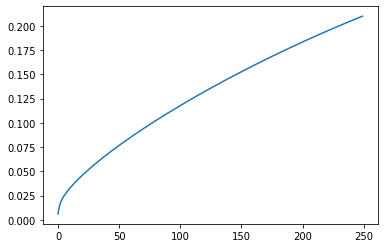

In [77]:
import matplotlib.pyplot as plt
plt.plot(pipeline.named_steps.pca.explained_variance_.cumsum())

In [ ]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(ngram_range=(1,1), 
                                         stop_words=stopwords.words('english'))),
    ('tfidf_transformer', TfidfTransformer()),
    ('pca', TruncatedSVD(n_components=2000)),
    ('classifier', LogisticRegression(solver='lbfgs', C=1, max_iter=10000))
])

pipeline.fit(X_train, y_train)

print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_train, pipeline.predict_proba(X_train)[:, 1]))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(pipeline.named_steps.pca.explained_variance_.cumsum())

# Multiclass

In [137]:
questions_df = pd.read_csv('question_topic.csv')
questions_df.sample(10)

,question_text,question_topic
3315,I think I'm going to get the Revere 4 Drawer C...,Returns & Refunds
4791,Could you give me a coupon or promo code so I ...,Sales/Promotions
542,Let's say I get the menthol ice tobacco cartri...,Returns & Refunds
2050,What are the dimensions of the Logo backpack (...,Product Specifications
41,What's the thickness of the band on the golden...,Product Specifications
2842,Do you have any women's leather boots in gray ...,Product Availability
614,I really like these tings (STYLE NUMBER: R1287...,Product Comparison
4413,I think I want to get the Military Jacket (Ite...,Returns & Refunds
1262,"You guys don't sell apparel, do you? I'd love ...",Product Availability
1811,If I order the Frontier Ring (R15544MSS) and d...,Returns & Refunds


In [138]:
questions_df.shape

(5000, 2)

In [139]:
print(questions_df['question_topic'].unique())

['Sales/Promotions' 'Shipping' 'Product Availability'
 'Product Specifications' 'Omnichannel' 'Product Comparison'
 'Returns & Refunds']


In [140]:
X = questions_df['question_text']
y = questions_df['question_topic']

c:\users\raian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sales/Promotions'),
  Text(1, 0, 'Shipping'),
  Text(2, 0, 'Product Availability'),
  Text(3, 0, 'Product Specifications'),
  Text(4, 0, 'Omnichannel'),
  Text(5, 0, 'Product Comparison'),
  Text(6, 0, 'Returns & Refunds')])

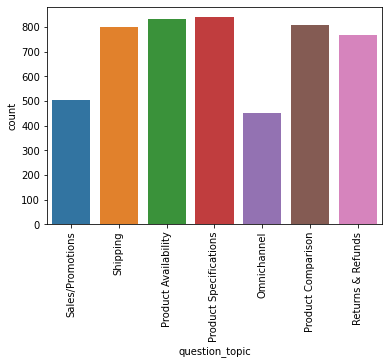

In [141]:
sns.countplot(y)
plt.xticks(rotation=90)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(min_df=3, max_df=1000)),
    ('tfidf_transformer', TfidfTransformer()),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=10000))
])

In [144]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer(max_df=1000, min_df=3)),
                ('tfidf_transformer', TfidfTransformer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [145]:
pipeline.predict(X_test)[:20]

array(['Returns & Refunds', 'Sales/Promotions', 'Product Specifications',
       'Shipping', 'Product Availability', 'Omnichannel',
       'Product Availability', 'Product Availability',
       'Returns & Refunds', 'Shipping', 'Product Comparison',
       'Returns & Refunds', 'Product Comparison', 'Omnichannel',
       'Returns & Refunds', 'Product Specifications', 'Shipping',
       'Product Comparison', 'Product Comparison', 'Shipping'],
      dtype=object)

In [146]:
pipeline.predict_proba(X_test)[1]

array([0.02483425, 0.04032134, 0.02611806, 0.02566996, 0.01323995,
       0.85311495, 0.01670148])

In [147]:
np.argmax(pipeline.predict_proba(X_test)[0])

4

In [148]:
pipeline.named_steps.classifier.classes_

array(['Omnichannel', 'Product Availability', 'Product Comparison',
       'Product Specifications', 'Returns & Refunds', 'Sales/Promotions',
       'Shipping'], dtype=object)

In [149]:
pipeline.named_steps.classifier.classes_[np.argmax(pipeline.predict_proba(X_test)[0])]

'Returns & Refunds'

In [150]:
from sklearn.metrics import confusion_matrix

In [151]:
confusion_matrix(y_test, pipeline.predict(X_test))

array([[ 90,   1,   0,   1,   0,   0,   0],
       [  0, 169,   1,   1,   1,   0,   0],
       [  0,   3, 149,   3,   0,   0,   0],
       [  0,   6,   3, 152,   0,   0,   0],
       [  0,   0,   0,   0, 170,   0,   0],
       [  0,   6,   0,   4,   0,  87,   0],
       [  0,   1,   0,   0,   0,   0, 152]], dtype=int64)

In [152]:
pd.DataFrame(confusion_matrix(y_test, pipeline.predict(X_test)), 
             columns=pipeline.classes_, index=pipeline.classes_)

,Omnichannel,Product Availability,Product Comparison,Product Specifications,Returns & Refunds,Sales/Promotions,Shipping
Omnichannel,90,1,0,1,0,0,0
Product Availability,0,169,1,1,1,0,0
Product Comparison,0,3,149,3,0,0,0
Product Specifications,0,6,3,152,0,0,0
Returns & Refunds,0,0,0,0,170,0,0
Sales/Promotions,0,6,0,4,0,87,0
Shipping,0,1,0,0,0,0,152


c:\users\raian\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


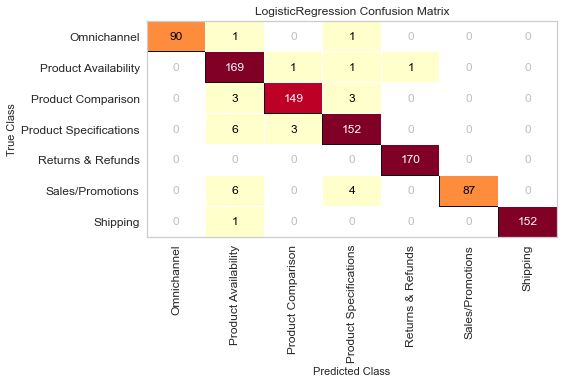

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [153]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(pipeline, classes=pipeline.classes_)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [154]:
roc_auc_score(y_test, pipeline.predict_proba(X_test))

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr')

- ovo: one vs one
- ovr: one vs rest: 

# Topic Modelling

In [44]:
import gensim

In [31]:
tokenized_sentences = [p.lower().split() for p in train_text ]
tokenized_sentences

[['be', 'yourself;', 'everyone', 'else', 'is', 'already', 'taken', 'change.'],
 ['a',
  'room',
  'without',
  'books',
  'is',
  'like',
  'a',
  'body',
  'without',
  'a',
  'soul',
  '.'],
 ['be',
  'the',
  'change',
  'that',
  'you',
  'wish',
  'to',
  'see',
  'in',
  'the',
  'world',
  'and',
  'change',
  'everything,',
  'this',
  'would',
  'change',
  'it',
  'all!.'],
 ['if',
  'you',
  'tell',
  'the',
  'truth,',
  'you',
  "don't",
  'have',
  'to',
  'remember',
  'change',
  'anything.'],
 ['always',
  'forgive',
  'your',
  'enemies;',
  'nothing',
  'annoys',
  'change',
  'them',
  'so',
  'much.']]

In [45]:
id2word = gensim.corpora.Dictionary(tokenized_sentences)

texts = tokenized_sentences

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


In [46]:
train_text[1]

'A room without books is like a body without a soul .'

In [47]:
corpus[1:2]

[[(5, 1),
  (8, 1),
  (9, 3),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 2)]]

In [48]:
id2word[15]

'without'

In [49]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [65]:
train_text[2]

'Be the change that you wish to see in the world and change everything, this would change it all!.'

In [62]:
print(lda_model.print_topics()[3])
doc_lda = lda_model[corpus]

(3, '0.143*"change" + 0.096*"the" + 0.049*"be" + 0.049*"world" + 0.049*"wish" + 0.049*"it" + 0.049*"and" + 0.049*"you" + 0.049*"in" + 0.049*"would"')


## LDA - Latent Dirichlet Allocation

In [159]:
dbpedia_df = pd.read_csv('sample_dbpedia.csv', 
                         skiprows=1, names = ['Label', 'Name', 'Text'])

In [160]:
dbpedia_df

,Label,Name,Text
0,14,The Still Point,The Still Point is a 2010 novel by British au...
1,12,Too Much Information (Maxïmo Park album),Too Much Information is the fifth studio albu...
2,3,Shazza,Shazza is the stage name of Magdalena Pańkows...
3,4,Luis Cetin,Luis Gustavo Cetin or simply Luis Cetin (born...
4,6,STARS-II,STARS-II (Stars-2) is a two-parts microsatell...
...,...,...,...
9995,12,Power of Soul (album),Power of Soul is an album by Idris Muhammad.
9996,3,Ronald White,Ronald Ronnie White (April 5 1939 – August 26...
9997,5,Daya Perera,Lt. Colonel Daya Perera PC (died June 16 2013...
9998,12,Gentlemen Start Your Egos,Gentlemen Start Your Egos is a 1991 album by ...


### DBPedia classes

- Company
- EducationalInstitution
- Artist
- Athlete
- OfficeHolder
- MeanOfTransportation
- Building
- NaturalPlace
- Village
- Animal
- Plant
- Album
- Film
- WrittenWork

In [161]:
labels = ['Company',
          'EducationalInstitution',
          'Artist',
          'Athlete',
          'OfficeHolder',
          'MeanOfTransportation',
          'Building',
          'NaturalPlace',
          'Village',
          'Animal',
          'Plant',
          'Album',
          'Film',
          'WrittenWork']

In [162]:
from sklearn.decomposition import LatentDirichletAllocation

In [163]:
dbpedia_df = dbpedia_df.sample(10000).reset_index(drop=True)

In [164]:
dbpedia_df

,Label,Name,Text
0,13,All Hat,All Hat is a 2007 Canadian western comedy fil...
1,2,Red Sea University,Red Sea University (also known as Jameat Al B...
2,10,Kauaiina howarthi,Kauaiina howarthi is a moth of the Geometrida...
3,13,Close Relations,Close Relations is a 1933 American comedy fil...
4,2,Pilot Rock High School,Pilot Rock High School is a public high schoo...
...,...,...,...
9995,3,Cedar Walton,Cedar Anthony Walton Jr. (January 17 1934 – A...
9996,11,Podochileae,Podochileae is an orchid tribe in the subfami...
9997,6,SS Tuxpam (1944),Tuxpam was a 1747 GRT suction hopper dredger ...
9998,1,Crazy John's,Crazy John's was a mobile phone retail chain ...


In [165]:
X = dbpedia_df['Text']
y = dbpedia_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [166]:
dataprep = Pipeline([
    ('count_vectorizer', CountVectorizer(max_df=1000, min_df=3)),
    ('tfidf_transformer', TfidfTransformer())
])


pipeline = Pipeline([
    ('dataprep', dataprep),
    ('topic_modelling', LatentDirichletAllocation(n_components=14, max_iter=100, n_jobs=-1))
])
# LDA is generative

pipeline.fit(X_train)

Pipeline(steps=[('dataprep',
                 Pipeline(steps=[('count_vectorizer',
                                  CountVectorizer(max_df=1000, min_df=3)),
                                 ('tfidf_transformer', TfidfTransformer())])),
                ('topic_modelling',
                 LatentDirichletAllocation(max_iter=100, n_components=14,
                                           n_jobs=-1))])

In [167]:
lda = pipeline.transform(X_test)

In [168]:
feature_names = pipeline.named_steps.dataprep.named_steps.count_vectorizer.get_feature_names()
feature_names

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '10th',
 '11',
 '110',
 '1100',
 '111',
 '112',
 '113',
 '114',
 '117',
 '119',
 '11th',
 '12',
 '120',
 '1200',
 '121',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '12th',
 '13',
 '130',
 '1300',
 '131',
 '133',
 '134',
 '135',
 '135th',
 '137',
 '138',
 '139',
 '13th',
 '14',
 '140',
 '1400',
 '14000',
 '143',
 '144',
 '147',
 '148',
 '149',
 '14th',
 '15',
 '150',
 '1500',
 '151',
 '152',
 '155',
 '1565',
 '158',
 '159',
 '1596',
 '15th',
 '16',
 '160',
 '1600',
 '16000',
 '1607',
 '161',
 '162',
 '1622',
 '1640',
 '165',
 '166',
 '1665',
 '1680',
 '1687',
 '1688',
 '1691',
 '16th',
 '17',
 '170',
 '1700',
 '171',
 '172',
 '1726',
 '1744',
 '1747',
 '1750',
 '1752',
 '1754',
 '1759',
 '1760',
 '1762',
 '1765',
 '1772',
 '1773',
 '1775',
 '1776',
 '1778',
 '1779',
 '1780',
 '1781',
 '1782',
 '1

In [169]:
len(feature_names)

9728

In [170]:
def get_topic(identifier, top_words=10):
    
    for topic_id, topic_word_probs in enumerate(pipeline.named_steps.topic_modelling.components_):
        if topic_id == identifier:
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words - 1 : -1]]
            
            return " ".join(top_feature_names)

In [171]:
topic_id_topic_mapping = {}

for i in range(14):
    topic_id_topic_mapping[i] = get_topic(i, top_words=3)
    
# these are words that are most probable to encounter in topic i
topic_id_topic_mapping

{0: 'mi historic village',
 1: 'university college school',
 2: 'she class navy',
 3: 'school river high',
 4: 'germany river pass',
 5: 'who football politician',
 6: 'genus family orchid',
 7: 'newspaper aircraft daily',
 8: 'species family genus',
 9: 'district village province',
 10: 'film album released',
 11: 'mountain łódź hong',
 12: 'river lake species',
 13: 'company based owned'}

In [172]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)

lda_2d_tsne = tsne.fit_transform(lda)
lda_df_tsne = pd.DataFrame(lda_2d_tsne)

lda_df_tsne.shape

(1000, 2)

NameError: name 'X_vis' is not defined

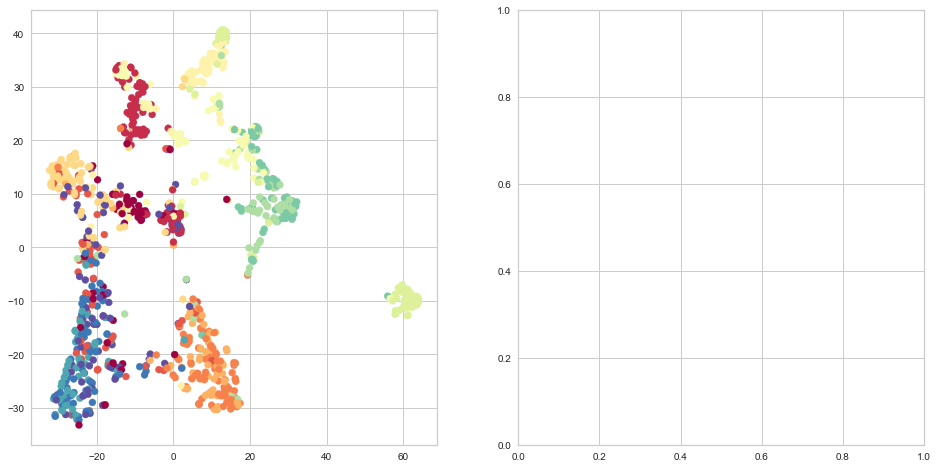

In [173]:
fig, axes = plt.subplots(1, 2, figsize = (16, 8))


axes[0].scatter(lda_df_tsne[0], lda_df_tsne[1], c = y_test, cmap = 'Spectral')
axes[1].scatter(lda_df_tsne[0], lda_df_tsne[1], c = X_vis['Most_Likely_Topic'], cmap = 'Spectral')

axes[0].axis('equal');
axes[1].axis('equal');

`!pip install pyLDAvis`

In [120]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(pipeline.named_steps.topic_modelling, 
                                 pipeline.named_steps.dataprep.transform(X_train), 
                                 pipeline.named_steps.dataprep.named_steps.count_vectorizer, 
                                 mds='pca')

panel

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.242956  0.010319       1        1  23.285783
13     0.211709  0.027328       2        1  18.495458
4      0.112842 -0.029615       3        1   9.311543
6      0.011734  0.252120       4        1   8.963853
12     0.118961 -0.114501       5        1   7.223903
0     -0.028193 -0.075759       6        1   6.133946
11    -0.083599 -0.008571       7        1   4.666001
1     -0.099529  0.109007       8        1   4.245676
10    -0.087282  0.088460       9        1   4.143553
3     -0.106351 -0.082031      10        1   4.081651
7     -0.089654 -0.035530      11        1   2.762903
9     -0.071036 -0.032895      12        1   2.257942
8     -0.065134 -0.052695      13        1   2.229661
5     -0.067424 -0.055638      14        1   2.198127, topic_info=            Term        Freq       Total Category  logprob  loglift
7599       river  124.000000  124.000000  Default  30.0000  30.0000
2958    district  118.000000  118.000000  Default  29.0000  29.0000
7839      school  133.000000  133.000000  Default  28.0000  28.0000
3528      family  120.000000  120.000000  Default  27.0000  27.0000
8335     species  113.000000  113.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
5884  mitsubishi    1.355176    2.741091  Topic14  -6.4328   3.1131
5176      launch    1.361048    3.118759  Topic14  -6.4285   2.9884
4345        hero    1.271541    2.741739  Topic14  -6.4965   3.0492
778          aka    1.258970    3.467589  Topic14  -6.5064   2.8044
8294       sound    1.322625    8.588437  Topic14  -6.4571   1.9468

[712 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
19       13  0.386438    106
176      13  0.466390   1834
300       1  0.191446   1944
300       3  0.765784   1944
353       1  0.428105   1991
...     ...       ...    ...
9763     13  0.599882   zone
9772     13  0.752826     īn
9774      7  0.910243   łódź
9786     10  0.823808   اباد
9787     11  0.825153  تلمبه

[1227 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 14, 5, 7, 13, 1, 12, 2, 11, 4, 8, 10, 9, 6])

----

In [121]:
dataprep = Pipeline([
    ('count_vectorizer', CountVectorizer(ngram_range=(2,2), max_df=1000, min_df=3)),
    ('tfidf_transformer', TfidfTransformer())
])


pipeline = Pipeline([
    ('dataprep', dataprep),
    ('topic_modelling', LatentDirichletAllocation(n_components=14, max_iter=100))
])

pipeline.fit(X_train, y_train)

c:\users\raian\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pipeline(steps=[('dataprep',
                 Pipeline(steps=[('count_vectorizer',
                                  CountVectorizer(max_df=1000, min_df=3,
                                                  ngram_range=(2, 2))),
                                 ('tfidf_transformer', TfidfTransformer())])),
                ('topic_modelling',
                 LatentDirichletAllocation(max_iter=100, n_components=14))])

In [122]:
lda = pipeline.transform(X_test)

c:\users\raian\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
feature_names = pipeline.named_steps.dataprep.named_steps.count_vectorizer.get_feature_names()

c:\users\raian\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(pipeline.named_steps.topic_modelling, 
                                 pipeline.named_steps.dataprep.transform(X_train), 
                                 pipeline.named_steps.dataprep.named_steps.count_vectorizer, 
                                 mds='tsne')

panel

c:\users\raian\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
7        1.425140 -203.131439       1        1  14.126962
3       93.696953  -55.018154       2        1  13.515724
1      141.694016   25.320429       3        1  12.119197
13    -126.233505    5.739788       4        1   8.885470
2      -59.868134  101.519302       5        1   7.694081
6      151.966629  133.119141       6        1   6.436622
4       12.542690 -101.441658       7        1   5.917578
10      49.372585   57.773476       8        1   4.939563
5      203.505997  -84.541840       9        1   4.852186
9      119.923477 -166.068970      10        1   4.830525
12     -19.315592   -8.882428      11        1   4.595170
8      -95.841057 -109.373474      12        1   4.463056
0       37.554749  165.057098      13        1   3.829652
11     243.648911   32.733547      14        1   3.794214, topic_info=              Term       Freq      Total Category  logprob  loglift
13984   species of  66.000000  66.000000  Default  30.0000  30.0000
8772    is species  62.000000  62.000000  Default  29.0000  29.0000
7149   high school  48.000000  48.000000  Default  28.0000  28.0000
8826    is village  58.000000  58.000000  Default  27.0000  27.0000
5223   directed by  53.000000  53.000000  Default  26.0000  26.0000
...            ...        ...        ...      ...      ...      ...
1628   an american   1.415297  44.689537  Topic14  -6.8994  -0.1807
3155      based in   1.195623  20.903266  Topic14  -7.0681   0.4105
2424       and the   1.181725  54.933934  Topic14  -7.0798  -0.5675
10651  new zealand   1.100437  13.710994  Topic14  -7.1511   0.7492
6250       for the   1.145586  56.583861  Topic14  -7.1109  -0.6281

[689 rows x 6 columns], token_table=       Topic      Freq                 Term
term                                       
35        10  0.904429                11 mi
377        1  0.349869              1948 is
377       14  0.349869              1948 is
611       12  0.699464              1986 in
643        8  0.200720              1990 is
...      ...       ...                  ...
17707      2  0.974460          written and
17709      2  0.963377           written by
17720     11  0.707816  württemberg germany
17787      3  0.749487              york it
17842      7  0.879783            اباد also

[1063 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 2, 14, 3, 7, 5, 11, 6, 10, 13, 9, 1, 12])

In [ ]:
X_train

In [ ]:
dbpedia_df.sample(10000).to_csv('sample_dbpedia.csv', index=False)

In [ ]:
pd.read_csv('imdb_dataset.csv').sample(5000).to_csv('sample_imdb.csv', index=False)

In [ ]:
dbpedia_df.sample(10000).to_csv('sample_dbpedia.csv', index=False)